fruits dataset을 'mass', 'width', 'height', 'color_score' 네가지 feature를 모두사용하여 네가지 과일을 모두 구분하는 multi-classification을 하고자 합니다.

4가지 classifier (Logistic Regression, SVM, Decision Tree, Random Forest)에 대해 학습해보고, 아래를 작성하여 pdf로 올려주세요.

1. 어떤 모델에서 테스트셋 구분에 가장 좋은 성능을 보이는지 간단한 그래프를 통해 구하세요. (scatter든, bar든 상관없음)

2. 그리고 그 때, [무게가 120, 너비가 6, 높이가 8, color_score가 0.7]인 과일은 무엇인지 그 모델을 가지고 추정하세요.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [3]:
fruits = pd.read_table('../fruit_data_with_colors.txt')

x_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_fruits = fruits['fruit_label']

In [101]:
# 4가지 classifier 각각의 train set과 test set에 대한 정확도를 저장할 배열
ret = []

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_fruits, y_fruits, random_state=0)

clf = LogisticRegression(max_iter=1500).fit(x_train, y_train)

logi_train = clf.score(x_train, y_train)
logi_test = clf.score(x_test, y_test)

ret.append([logi_train, logi_test])

print('Accuracy of Logistic Regression classifier on training set: {:.2f}'.format(logi_train))
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(logi_test))

Accuracy of Logistic Regression classifier on training set: 0.82
Accuracy of Logistic Regression classifier on test set: 0.47


### SVM

In [35]:
from sklearn.svm import SVC

In [104]:
x_train, x_test, y_train, y_test = train_test_split(x_fruits, y_fruits, random_state=0)

clf = SVC(kernel='linear').fit(x_train, y_train)

svc_train = clf.score(x_train, y_train)
svc_test = clf.score(x_test, y_test)

ret.append([svc_train, svc_test])

print('Accuracy of SVC classifier on training set: {:.2f}'.format(svc_train))
print('Accuracy of SVC classifier on test set: {:.2f}'.format(svc_test))

Accuracy of SVC classifier on training set: 0.82
Accuracy of SVC classifier on test set: 0.60


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x_fruits, y_fruits, random_state=0)

clf = DecisionTreeClassifier().fit(x_train, y_train)

dt_train = clf.score(x_train, y_train)
dt_test = clf.score(x_test, y_test)

ret.append([dt_train, dt_test])

print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dt_train))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt_test))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.87


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x_fruits, y_fruits, random_state=0)

clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(x_train, y_train)

rf_train = clf.score(x_train, y_train)
rf_test = clf.score(x_test, y_test)

ret.append([rf_train, rf_test])

print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_train))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_test))

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.80


In [125]:
ret = np.round(ret, 2).T
ret

array([[0.82, 0.82, 1.  , 1.  ],
       [0.47, 0.6 , 0.87, 0.8 ]])

<IPython.core.display.Javascript object>


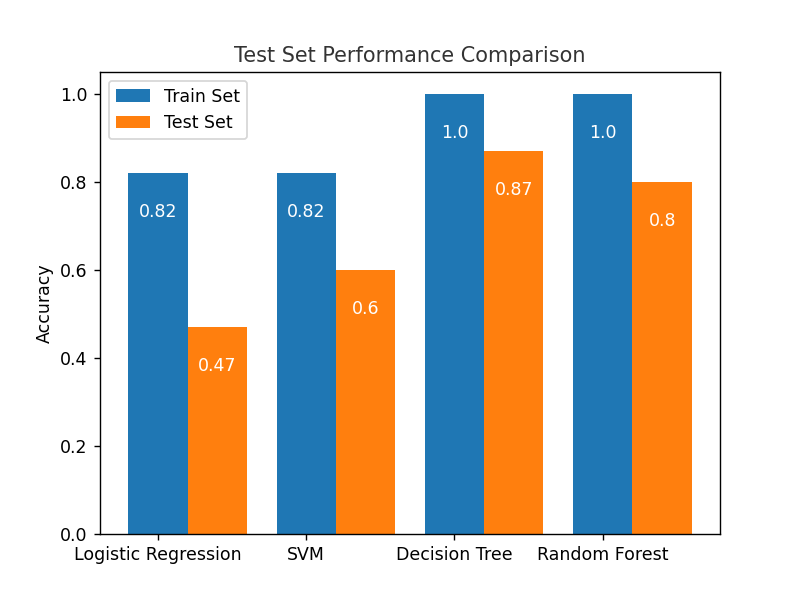

In [153]:
plt.figure()
classifier = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
pos = np.arange(len(classifier))
x1 = plt.bar(pos, ret[0], align='center', width=0.4)
x2 = plt.bar(pos+0.4, ret[1], align='center', width=0.4)
plt.xticks(pos, classifier)
plt.ylabel('Accuracy')
plt.title('Test Set Performance Comparison', alpha=0.8)
plt.legend((x1[0], x2[0]), ('Train Set', 'Test Set'))

# 바 크기 표시
for p in x1.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{float(height)}", (left+width/2, height-0.1), ha='center', color='#FFFFFF')
    
for p in x2.patches:
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate(f"{float(height)}", (left+width/2, height-0.1), ha='center', color='#FFFFFF')

-> 4가지 classifier의 성능 지표를 나타낸 바 차트를 보아 **Decision Tree**에서 테스트셋 구분에 가장 좋은 성능을 보임

Decision Tree로 재설정 후 `[무게가 120, 너비가 6, 높이가 8, color_score가 0.7]`인 과일 추정

In [154]:
# 라벨에 해당하는 과일 이름을 찾아주는 lookup
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x_fruits, y_fruits, random_state=0)

clf = DecisionTreeClassifier().fit(x_train, y_train)

fruit_prediction = clf.predict([[120, 6, 8, 0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'